In [1]:
# %load plot_attack_results_parity_new_new.py
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv
import pandas as pd
# import sys
# sys.path.insert(0, '..')
# from src.synth.evaluate import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob,os

# save_format='.jpg'
save_format='.pdf'
s=15

### Step-1. Loading datasets for baseline comparison (different from loading only our strategy)

In [2]:
# load data for baselines
dl=pd.DataFrame()
# t_list_1 = {'spimr':'DD', 'spim':'DE', 'spimy1s':'ED', 'spimy1s1':'EE'} # ---y1s1
# t_list_2 = {'spimrr':'DD', 'spim0':'DE', 'spimy1s':'ED', 'spimy1s0':'EE'}# ---y1s0
attack_list={'random':'Random','dice':'DICE','sacide':'SACIDE','structack_dg_comm':'Structack','structack_pr_katz':'Structack_2','prbcd':'PR-BCD','y1s1-DD':'y1s1-DD','y1s0-DD':'y1s0-DD'}
# dataset_list_1=['bail','german','credit']
# dataset_list_2=['pokec_z','pokec_n','dblp']
model_list={'gcn':'GCN','gat':'GAT','gsage':'GraphSAGE','fairgnn':'FairGNN'}
path=os.getcwd()+'\\'#+dataset+'\\'
file=glob.glob(os.path.join(path,"*.csv"))
for f in file:
    fname=f.strip().split('\\')[-1]
    arr=fname.strip('.csv').split('-') # result, bail, gcn, fair_attack, y1s1, DD, deg0, null, 0.05,calib
    if arr[2]=='region':#pokec
        arr=arr[0:2]+arr[3:]
    content = pd.read_csv(f)
    content.insert(content.shape[1], 'Dataset', arr[1][0].upper()+arr[1][1:] if arr[1] !='dblp' else 'DBLP')
    content.insert(content.shape[1], 'Model', model_list[arr[2]])
#     print(arr)
    if arr[3]=='fair_attack':
        content.insert(content.shape[1], 'Attack', arr[4]+'-'+arr[5])
        content.insert(content.shape[1], 'ptb_rate', float(0) if arr[3] == 'none' else float(arr[8]))
        content.insert(content.shape[1], 'Category', 'Ours')
#         content.insert(content.shape[1], 'Color', '#137feb' if arr[4]=='y1s1' else '#71aeeb')
    else:
#         print(arr)
        content.insert(content.shape[1], 'Attack', attack_list[arr[3]] if arr[3] != 'none' else 'none')
        content.insert(content.shape[1], 'ptb_rate', float(0) if arr[3] == 'none' else float(arr[4]))
        if arr[3] in ['random','dice']:
            content.insert(content.shape[1], 'Category', 'Heuristic')
#             content.insert(content.shape[1], 'Color', '#ed5909' if arr[3]=='random' else '#ed8751')
        elif arr[3] in ['prbcd']:
            content.insert(content.shape[1], 'Category', 'Acc-Targeted')
#             content.insert(content.shape[1], 'Color', '#04c44a' if arr[3]=='prbcd' else '#7be3a1')
#     content.insert(content.shape[1], 'Direction', 'null' if arr[3] == 'none' else arr[4])
#     content.insert(content.shape[1], 'Strategy', 'null' if arr[3] == 'none' else arr[5])
#     content.insert(content.shape[1], 'Degree', 'null' if arr[3] == 'none' else arr[6])
#     content.insert(content.shape[1], 'Degree_direction', 'null' if arr[3] == 'none' else arr[7])
    
    # non-absolute parity
#     content.insert(content.shape[1], 'true_parity', content['yp1.a1']-content['yp1.a0'])
    # calibrated label
#     content.insert(content.shape[1], 'labelCalib', 'yes' if arr[-1] == 'calib' else 'no')

    if len(dl)==0:
        dl=content
    else:
        dl=dl.append(content,ignore_index=True)
    if arr[3]=='none': # insert ptb_rate=0 for all attacks
        for atk in attack_list.keys():
            content['Attack']=attack_list[atk]
            for c in ['Heuristic','Acc-Targeted','Ours']:
                content['Category']= c
                dl = dl.append(content, ignore_index=True)
dl['_']=''
print(len(dl))

11140


In [152]:
# load data with different train percent
dl=pd.DataFrame()
# t_list_1 = {'spimr':'DD', 'spim':'DE', 'spimy1s':'ED', 'spimy1s1':'EE'} # ---y1s1
# t_list_2 = {'spimrr':'DD', 'spim0':'DE', 'spimy1s':'ED', 'spimy1s0':'EE'}# ---y1s0
attack_list=['DD','DE','ED','EE']
model_list={'gcn':'GCN','gat':'GAT','gsage':'GraphSAGE','fairgnn':'FairGNN'}
# dataset_list_1=['bail','german','credit']
# dataset_list_2=['pokec_z','pokec_n','dblp']
path=os.getcwd()+'\\'#+dataset+'\\'
file=glob.glob(os.path.join(path,"*.csv"))
for f in file:
    fname=f.strip().split('\\')[-1]
    arr=fname.strip('.csv').split('-') # result-dblp-gcn-fair_attack-y1s1-DD-deg0-null-0.15-0.1
    if arr[2]=='region':#pokec  result-pokec_z-region-gcn-fair_attack-y1s1-DD-deg0-null-0.15-0.1
        arr=arr[0:2]+arr[3:]
#     print(arr)
    content = pd.read_csv(f)
#     if len(arr)>=9:
    content.insert(content.shape[1], 'Dataset', arr[1][0].upper()+arr[1][1:] if arr[1] !='dblp' else 'DBLP')
    content.insert(content.shape[1], 'Model', model_list[arr[2]])
    content.insert(content.shape[1], 'Attack', arr[3])
    content.insert(content.shape[1], 'Target', 'null' if arr[3] != 'fair_attack' else arr[4])
    content.insert(content.shape[1], 'Strategy', 'null' if arr[3] != 'fair_attack' else arr[5])
    content.insert(content.shape[1], 'Degree', 'null' if arr[3] != 'fair_attack' else arr[6])
    content.insert(content.shape[1], 'Degree_direction', 'null' if arr[3] != 'fair_attack' else arr[7])
    if len(arr)>=9:
        content.insert(content.shape[1], 'ptb_rate', float(0) if arr[3] != 'fair_attack' else float(arr[8]))
    else:
        content.insert(content.shape[1], 'ptb_rate', float(0) if arr[3] == 'none' else float(arr[4]))
    # non-absolute parity
    content.insert(content.shape[1], 'true_parity', content['yp1.y0a0'] + content['yp1.y1a0'] - content['yp1.y1a1'] - content['yp1.y0a1'])

    # uncomment if plot x=train_percent
    if len(arr)==10:
        content.insert(content.shape[1], 'Training', int(float(arr[9])*100))
    else:# train_percent=0.5
        content.insert(content.shape[1], 'Training', int(50))          

    if len(dl)==0:
        dl=content
    else:
        dl=dl.append(content,ignore_index=True)
#     if arr[3]=='none': # insert ptb_rate=0 for all attacks
#         for atk in attack_list:
#             content['Strategy']=atk
#             content['Target']='y1s1'           
#             dl = dl.append(content, ignore_index=True)               
#             content['Degree']=atk
#             content['Target']='y1s0'           
#             dl = dl.append(content, ignore_index=True)
    if arr[3]=='none': # insert ptb_rate=0 for all attacks
        for atk in attack_list:
            content['Strategy']=atk
            content['Target']='y1s1'
            for deg in ['deg0','deg1','deg2','deg3']:
                content['Degree']=deg
                content['Degree_direction']='hl'
                dl = dl.append(content, ignore_index=True)
#                 print(content)
                content['Degree'] = deg
                content['Degree_direction'] = 'lh'
                dl = dl.append(content, ignore_index=True)
                content['Degree'] = deg
                content['Degree_direction'] = 'null'
                dl = dl.append(content, ignore_index=True)
            content['Strategy']=atk
            content['Target']='y1s0'
            for deg in ['deg0','deg1','deg2','deg3']:
                content['Degree']=deg
                content['Degree_direction']='hl'
                dl = dl.append(content, ignore_index=True)
                content['Degree'] = deg
                content['Degree_direction'] = 'lh'
                dl = dl.append(content, ignore_index=True)
                content['Degree'] = deg
                content['Degree_direction'] = 'null'
                dl = dl.append(content, ignore_index=True)
                
print(len(dl))

21220


<Figure size 432x288 with 0 Axes>

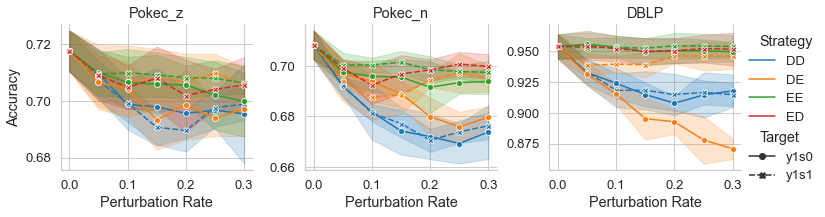

In [75]:
# Plot_acc:
plt.figure()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
# fig, ax = plt.subplots(ncols=1,nrows=3)
dataset=['DBLP','Pokec_z','Pokec_n']
facet_kws1 = {'sharey': False, 'sharex': True}  #

fg1=sns.relplot(
    data=dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1', 'y1s0']) & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset)& dl.Training.isin(['0.5'])],
    x="ptb_rate", y="acc", hue="Strategy", style="Target",  ci='sd',
    col="Dataset", kind="line", markers=True, dashes=True, aspect=1.15,  palette="tab10",# palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), height=3,facet_kws=facet_kws1)
# plt.legend(bbox_to_anchor=(1, 1.02,))
# leg = fg1._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1
fg1.set_ylabels("Accuracy", clear_inner=False)
fg1.set_xlabels("Perturbation Rate", clear_inner=False)
fg1.set_titles('{col_name}')
# plt.close(fg1.fig)
plt.savefig('all-acc-gcn'+save_format, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

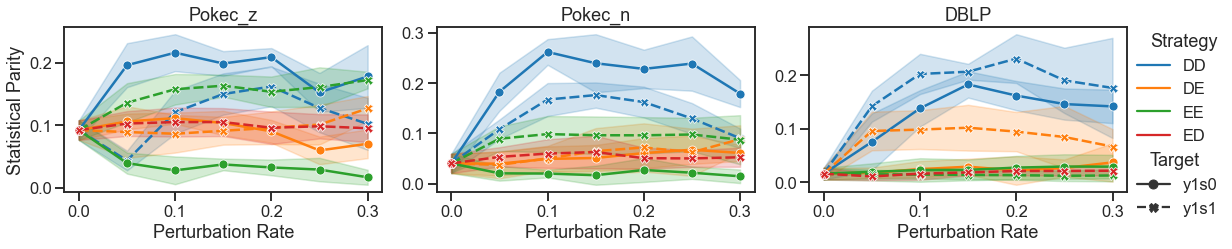

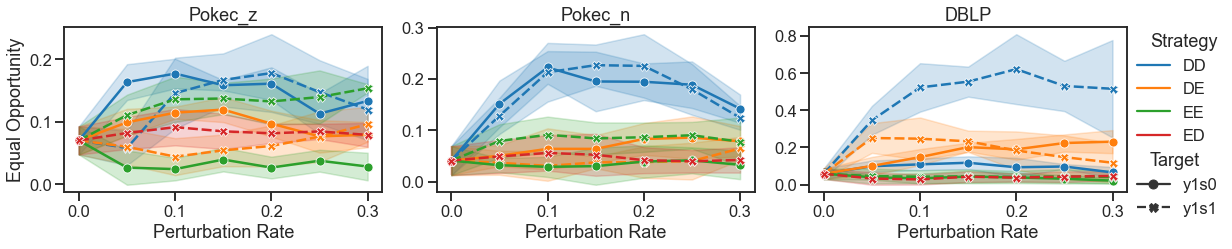

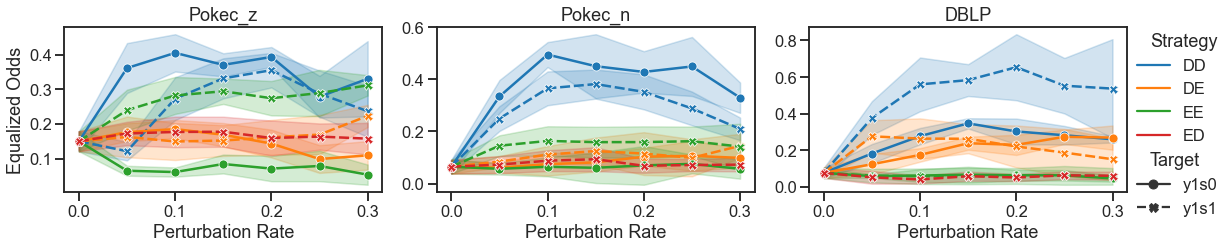

In [156]:
# Plot_all_parity:
plt.figure()
# sns.set(font_scale=1.4)
sns.set_context(context='talk')
# sns.set_style("ticks")
# sns.despine(top=False, right=False, left=False, bottom=False)
# fig, ax = plt.subplots(ncols=1,nrows=3)
dataset=['DBLP','Pokec_z','Pokec_n']
facet_kws1 = {'sharey': True, 'sharex': True}  #
facet_kws2 = {'sharey': False, 'sharex': True} 
fg1=sns.relplot(
    data=dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1', 'y1s0']) & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset)& dl.Training.isin(['50'])],
    x="ptb_rate", y="parity", hue="Strategy", style="Target",  ci='sd',
    col="Dataset", kind="line", markers=True, dashes=True, col_wrap=3, aspect=1.5,  palette="tab10",linewidth=2.5,# palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), height=3.5,facet_kws=facet_kws2)
# plt.legend(bbox_to_anchor=(1, 1.02,))
# leg = fg1._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1
fg1.set_ylabels("Statistical Parity", clear_inner=False)
fg1.set_xlabels("Perturbation Rate", clear_inner=False)
fg1.set_titles('{col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.close(fg1.fig)
plt.savefig('all-parity-gcn'+save_format, bbox_inches='tight')


# equality
 #
# plt.subplot(3,1,2)
fg2=sns.relplot(
    data=dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1', 'y1s0']) & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset)& dl.Training.isin(['50'])],
    x="ptb_rate", y="equality", hue="Strategy", style="Target",  ci='sd',
    col="Dataset", kind="line", markers=True, dashes=True, col_wrap=3, aspect=1.5,  palette="tab10",linewidth=2.5,# palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), height=3.5,facet_kws=facet_kws2)

# leg = fg2._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1

fg2.set_ylabels("Equal Opportunity", clear_inner=False)
fg2.set_xlabels("Perturbation Rate", clear_inner=False)
fg2.set_titles('{col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
plt.savefig('all-equality-gcn'+save_format, bbox_inches='tight')

# eq_odds
# plt.subplot(3,1,3)
fg3=sns.relplot(
    data=dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1', 'y1s0']) & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset)& dl.Training.isin(['50'])],
    x="ptb_rate", y="eq_odds", hue="Strategy", style="Target",  ci='sd',
    col="Dataset", kind="line", markers=True, dashes=True, col_wrap=3, aspect=1.5,  palette="tab10",linewidth=2.5,# palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), height=3.5,facet_kws=facet_kws2)

# leg = fg3._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1 
# leg.scale=20
# leg.borderaxespad=0.1
fg3.set_ylabels("Equalized Odds", clear_inner=False)
fg3.set_xlabels("Perturbation Rate", clear_inner=False)
fg3.set_titles('{col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.legend(markerscale=40)
# plt.close(fg2.fig) 
# plt.tight_layout()
# plt.show()
plt.savefig('all-eqodds-gcn'+save_format, bbox_inches='tight')
# plt.close()

<Figure size 432x288 with 0 Axes>

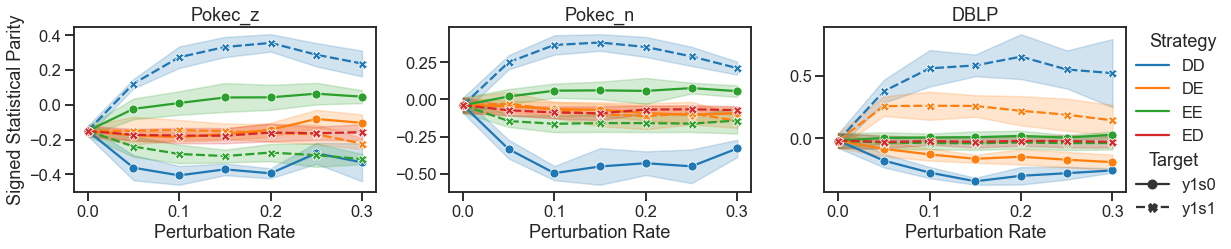

In [123]:
# Plot_SIGNED parity:
plt.figure()
sns.set_context(context='talk')
# sns.set(font_scale=1.2)
# sns.set_style("whitegrid")
# fig, ax = plt.subplots(ncols=1,nrows=3)
dataset=['DBLP','Pokec_z','Pokec_n']
facet_kws1 = {'sharey': False, 'sharex': True}  #

fg1=sns.relplot(
    data=dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1', 'y1s0']) & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset)& dl.Training.isin(['0.5'])],
    x="ptb_rate", y="true_parity", hue="Strategy", style="Target",  ci='sd',
    col="Dataset", kind="line", markers=True, dashes=True, aspect=1.5,  palette="tab10",# palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), height=3.5,facet_kws=facet_kws1)
# plt.legend(bbox_to_anchor=(1, 1.02,))
# leg = fg1._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1
fg1.set_ylabels("Signed Statistical Parity", clear_inner=False)
fg1.set_xlabels("Perturbation Rate", clear_inner=False)
fg1.set_titles('{col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.close(fg1.fig)
plt.savefig('all-signed-parity-gcn'+save_format, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

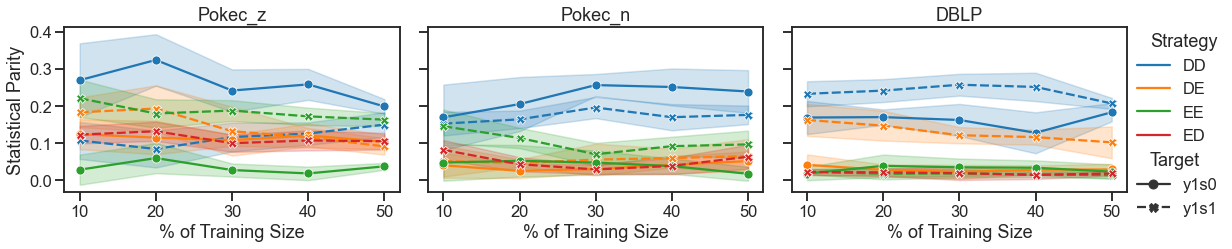

In [147]:
# Plot_all_parity: with changes in train_percent
# ptb_rate=0.15
plt.figure()
sns.set_context(context='talk')
dataset=['DBLP','Pokec_z','Pokec_n']
facet_kws = {'sharey': True, 'sharex': True}  #

# sns.set(font_scale=1.3)
# sns.set_style("whitegrid")

fg=sns.relplot(
    data=dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1', 'y1s0']) & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset)& dl.ptb_rate.isin(['0.15'])],
    x="Training", y="parity", hue="Strategy", style="Target",  ci='sd',
    col="Dataset", kind="line", markers=True, dashes=True, aspect=1.5,  palette="tab10",
    col_order='Pokec_z Pokec_n DBLP'.split(), height=3.5,facet_kws=facet_kws)
# plt.legend(bbox_to_anchor=(1, 1.02,))
# leg = fg._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1
# plt.ylabel("Statistical Parity")
fg.set_ylabels("Statistical Parity", clear_inner=False)
fg.set_xlabels("% of Training Size", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
# sns.set_style('whitegrid')
fg.set_titles('{col_name}')
# plt.legend(bbox_to_anchor=(1,1), loc=2)
# fg.add_legend()
# plt.show()
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# sns.color_palette()
fg.savefig('all-parity-gcn-train-percent'+save_format, bbox_inches='tight')
# plt.close()

In [135]:
print(dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1', 'y1s0']) & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset)& dl.ptb_rate.isin(['0.15'])])

            acc       auc  precision    recall      maf1      mif1    yp1.a1  \
7610   0.897372  0.964892   0.834586  0.853846  0.883807  0.897372  0.453901   
7611   0.889862  0.965851   0.838710  0.812500  0.872479  0.889862  0.448980   
7612   0.887359  0.965595   0.821429  0.851852  0.875243  0.887359  0.543046   
7613   0.887359  0.957211   0.843478  0.782258  0.865679  0.887359  0.428571   
7614   0.889862  0.965507   0.897959  0.777385  0.875545  0.889862  0.401361   
...         ...       ...        ...       ...       ...       ...       ...   
20990  0.700078  0.767174   0.758682  0.632517  0.699754  0.700078  0.544633   
20991  0.706735  0.773556   0.779661  0.635174  0.706588  0.706735  0.550056   
20992  0.711433  0.785258   0.763760  0.663235  0.711426  0.711433  0.573333   
20993  0.706343  0.776534   0.771548  0.659042  0.706271  0.706343  0.552604   
20994  0.721222  0.780181   0.754072  0.693114  0.721217  0.721222  0.590466   

         yp1.a0  yp1.y1a1  yp1.y1a0  ..

<Figure size 432x288 with 0 Axes>

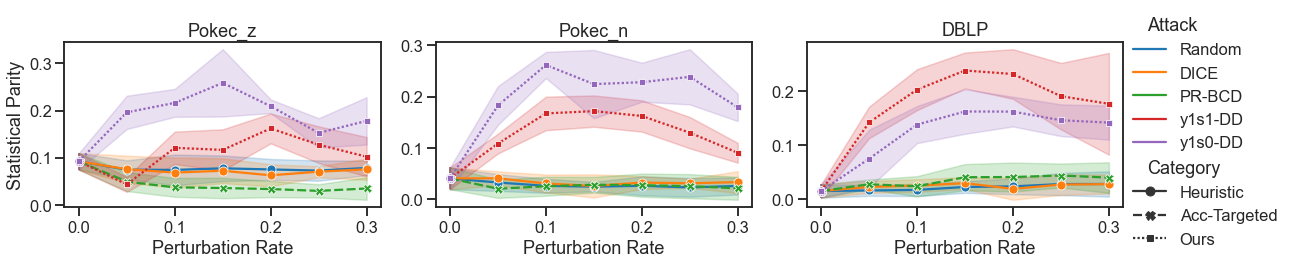

In [141]:
# Plot_baselines:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Converts a line style to a format acceptable by Seaborn
def get_dash_pattern(style):
    _, dash = mpl.lines._get_dash_pattern(style)
    return dash if dash else (None, None)

plt.figure()
# sns.set(font_scale=1.2)
# sns.set_style("whitegrid")
sns.set_context(context='talk')
dataset=['DBLP','Pokec_z','Pokec_n']
facet_kws = {'sharey': False, 'sharex': True}  #dl.Strategy.isin(['DD']) & dl.Direction.isin(['y1s1', 'y1s0']) or
# sns.set(font_scale=1.3)
# sns.set_style("whitegrid")
attack_list=['Random','DICE','PR-BCD','y1s1-DD','y1s0-DD']
# feats = (dl[['Category', 'Color']]#, 'linestyles', 'point'
#          .set_index('Category').drop_duplicates().to_dict())
# palette= feats['Color']#, feats['linestyles'], feats['point']
fg=sns.relplot(
    data=dl[( dl.Attack.isin(attack_list) )  & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset) ],
    x="ptb_rate", y="parity", hue="Attack", style="Category", ci='sd',hue_order='Random DICE PR-BCD y1s1-DD y1s0-DD'.split(),
    style_order='Heuristic Acc-Targeted Ours'.split(),#platte=palette,
    col="Dataset", kind="line", markers=True, dashes=True, col_wrap=3,aspect=1.5,  palette="tab10",height=3.5, # palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), facet_kws=facet_kws)
# plt.legend(bbox_to_anchor=(1, 1.02,))
# plt.ylabel("Statistical Parity")
fg.set_ylabels("Statistical Parity", clear_inner=False)
fg.set_xlabels("Perturbation Rate", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
# fg.set(style='whitegrid')
# leg = fg._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1
fg.set_titles('{col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.show()
fg.savefig('all-parity-gcn-baselines'+save_format, bbox_inches='tight')
# plt.close()

<Figure size 432x288 with 0 Axes>

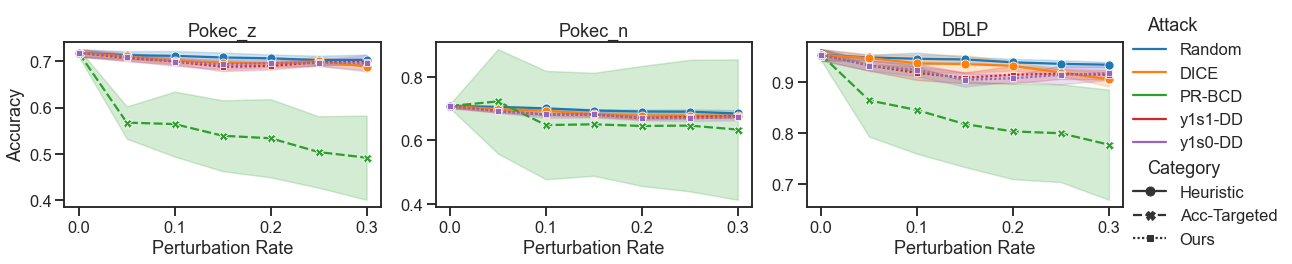

In [150]:
# Plot_baselines acc:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Converts a line style to a format acceptable by Seaborn
def get_dash_pattern(style):
    _, dash = mpl.lines._get_dash_pattern(style)
    return dash if dash else (None, None)

plt.figure()
# sns.set(font_scale=1.2)
# sns.set_style("whitegrid")
sns.set_context(context='talk')
dataset=['DBLP','Pokec_z','Pokec_n']
facet_kws = {'sharey': False, 'sharex': True}  #dl.Strategy.isin(['DD']) & dl.Direction.isin(['y1s1', 'y1s0']) or
# sns.set(font_scale=1.3)
# sns.set_style("whitegrid")
attack_list=['Random','DICE','PR-BCD','y1s1-DD','y1s0-DD']
# feats = (dl[['Category', 'Color']]#, 'linestyles', 'point'
#          .set_index('Category').drop_duplicates().to_dict())
# palette= feats['Color']#, feats['linestyles'], feats['point']
fg=sns.relplot(
    data=dl[( dl.Attack.isin(attack_list) )  & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset) ],
    x="ptb_rate", y="acc", hue="Attack", style="Category", ci='sd',hue_order='Random DICE PR-BCD y1s1-DD y1s0-DD'.split(),
    style_order='Heuristic Acc-Targeted Ours'.split(),#platte=palette,
    col="Dataset", kind="line", markers=True, dashes=True, col_wrap=3,aspect=1.5,  palette="tab10",height=3.5, # palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), facet_kws=facet_kws)
# plt.legend(bbox_to_anchor=(1, 1.02,))
# plt.ylabel("Statistical Parity")
fg.set_ylabels("Accuracy", clear_inner=False)
fg.set_xlabels("Perturbation Rate", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
# fg.set(style='whitegrid')
# leg = fg._legend
# leg.set_bbox_to_anchor([1.01, 1])  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1
fg.set_titles('{col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.show()
fg.savefig('all-acc-gcn-baselines'+save_format, bbox_inches='tight')
# plt.close()

### Step-2: this is the figures we have in paper, generates parity among baselines

<Figure size 432x288 with 0 Axes>

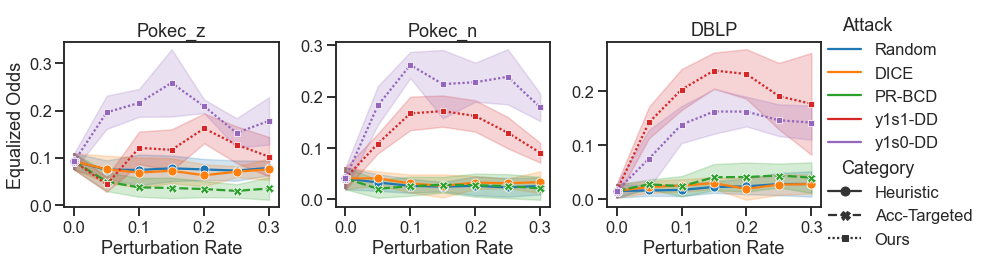

In [5]:
# Plot_baselines :
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Converts a line style to a format acceptable by Seaborn
def get_dash_pattern(style):
    _, dash = mpl.lines._get_dash_pattern(style)
    return dash if dash else (None, None)

plt.figure()
# sns.set(font_scale=1.2)
# sns.set_style("whitegrid")
sns.set_context(context='talk')
dataset=['DBLP','Pokec_z','Pokec_n']
facet_kws = {'sharey': False, 'sharex': True}  #dl.Strategy.isin(['DD']) & dl.Direction.isin(['y1s1', 'y1s0']) or
# sns.set(font_scale=1.3)
# sns.set_style("whitegrid")
attack_list=['Random','DICE','PR-BCD','y1s1-DD','y1s0-DD']
# feats = (dl[['Category', 'Color']]#, 'linestyles', 'point'
#          .set_index('Category').drop_duplicates().to_dict())
# palette= feats['Color']#, feats['linestyles'], feats['point']
fg=sns.relplot(
    data=dl[( dl.Attack.isin(attack_list) )  & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset) ],
    x="ptb_rate", y="parity", hue="Attack", style="Category", ci='sd',hue_order='Random DICE PR-BCD y1s1-DD y1s0-DD'.split(),
    style_order='Heuristic Acc-Targeted Ours'.split(),#platte=palette,
    col="Dataset", kind="line", markers=True, dashes=True, col_wrap=3,aspect=1.1,  palette="tab10",height=3.5, # palette="Set2",
    col_order='Pokec_z Pokec_n DBLP'.split(), facet_kws=facet_kws)
# plt.legend(bbox_to_anchor=(1, 1.02,))
# plt.ylabel("Statistical Parity")
fg.set_ylabels("Equalized Odds", clear_inner=False)
fg.set_xlabels("Perturbation Rate", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
# fg.set(style='whitegrid')
# leg = fg._legend
# leg.set_bbox_to_anchor((-3.7, 0.37, 4.4, .102))  # coordinates of lower left of bounding box
# leg._loc = 1  
# leg.borderaxespad=0.1
# leg.ncol=2
fg.set_titles('{col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.show()
# fg.savefig('test-1'+save_format, bbox_inches='tight')
# plt.close()

### Step-3: This is trying to use the same data, the legend is inconsistent with plots

<Figure size 432x288 with 0 Axes>

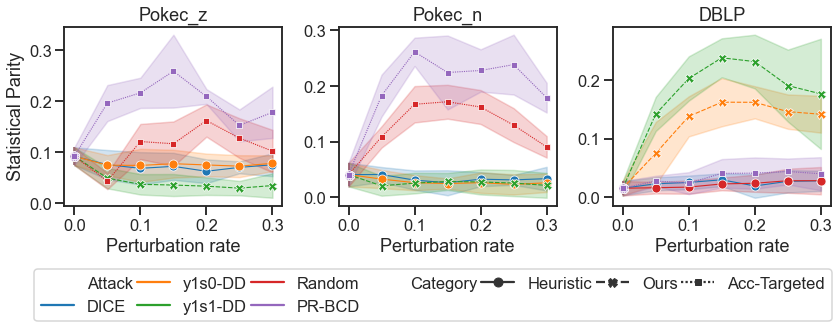

In [4]:
dataset=['DBLP','Pokec_z','Pokec_n']
measure = 'parity'
attack_list=['Random','DICE','PR-BCD','y1s1-DD','y1s0-DD']
plt.figure()
sns.set_context(context='talk') 
g = sns.FacetGrid(dl[( dl.Attack.isin(attack_list) )  & dl.Model.isin(['GCN']) & dl.Dataset.isin(dataset) ], col='Dataset', sharey=False, height=4, col_order='Pokec_z Pokec_n DBLP'.split() )
g.map(sns.lineplot,"ptb_rate", measure, "Attack","_","Category", markers=True, dashes=True,ci='sd')
# g.set
g.set_titles('{col_name}')
g.set_axis_labels("Perturbation rate", "Statistical Parity")
# g.hue_kwargs({"hue_order":['Random','DICE,' PR-BCD',' y1s1-DD',' y1s0-DD']})
plt.legend(bbox_to_anchor=(-2.7, -.4, 3.75, .102), loc='upper left',
                      ncol=7, mode="expand", borderaxespad=0.6)
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.savefig('test-2.pdf', bbox_inches='tight')

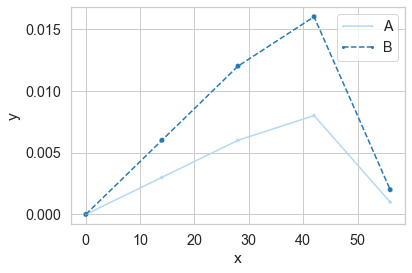

In [41]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Converts a line style to a format acceptable by Seaborn
def get_dash_pattern(style):
    _, dash = mpl.lines._get_dash_pattern(style)
    return dash if dash else (None, None)

data_tmp = pd.DataFrame({
    'x': [0,14,28,42,56, 0,14,28,42,56],
    'y': [0, 0.003, 0.006, 0.008, 0.001, 0*2, 0.003*2, 0.006*2, 0.008*2, 0.001*2],
    'cat': ['A','A','A','A','A','B','B','B','B','B'],
    'color': ['#B5D8F0','#B5D8F0','#B5D8F0','#B5D8F0','#B5D8F0',
              '#247AB2','#247AB2','#247AB2','#247AB2','#247AB2'],
    'point': [14,14,14,14,14,28,28,28,28,28],
    'linestyles':['-','-','-','-','-','--','--','--','--','--']})
# Extract plot features as dicts
feats = (data_tmp[['cat', 'color', 'linestyles', 'point']]
         .set_index('cat').drop_duplicates().to_dict())
palette, dashes, sizes = feats['color'], feats['linestyles'], feats['point']
# Convert line styles to dashes
dashes = {k: get_dash_pattern(v) for k, v in dashes.items()}
# Lines
lines = sns.lineplot(x="x", y="y", hue="cat", style="cat", data=data_tmp,
                     palette=palette, dashes=dashes)
# Points
sns.scatterplot(x="x", y="y", hue="cat", size="cat", data=data_tmp,
                palette=palette, sizes=sizes, legend=False)
# Fix legend
for t, l in zip(lines.legend().get_texts(), lines.legend().get_lines()):
    l.set_marker('o')
    l.set_markersize(sizes.get(l.get_label(), 0) / t.get_fontsize())
plt.show()

<Figure size 432x288 with 0 Axes>

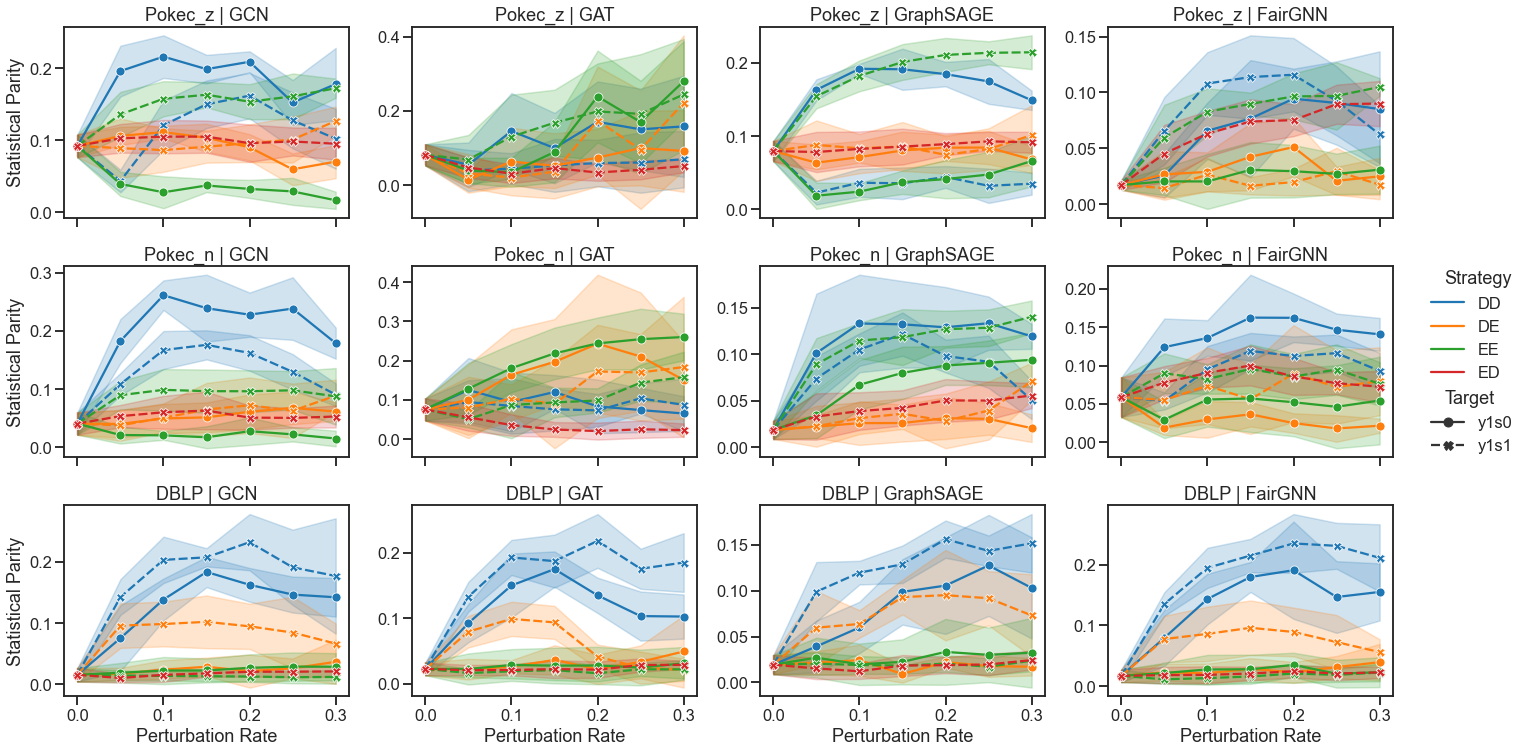

In [130]:
# Plot_pokec_parity:
dataset=['DBLP','Pokec_z','Pokec_n']
plt.figure()
sns.set_context(context='talk')
# sns.set(font_scale=1.8)
# sns.set_style("whitegrid")
facet_kws = {'sharey': False, 'sharex': True}  # TODO-Y axis only share per row
# DBLP
fg1=sns.relplot(data=dl[dl.Strategy.isin(attack_list) & dl.Target.isin(['y1s1','y1s0']) & dl.Dataset.isin(dataset) & dl.Training.isin(['0.5']) ], #& dl.Model.isin(['gcn'])
            x="ptb_rate", y="parity", hue="Strategy", style="Target",ci='sd',aspect=1.4,  palette="tab10",
            col="Model",kind="line",markers=True, dashes=True,height=3.5,row="Dataset",row_order='Pokec_z Pokec_n DBLP'.split(),
            col_order='GCN GAT GraphSAGE FairGNN'.split(),facet_kws=facet_kws)
# plt.legend(bbox_to_anchor=(1,1.02,))
leg = fg1._legend
leg.set_bbox_to_anchor([1.01, 0.65])  # coordinates of lower left of bounding box
leg._loc = 1  
leg.borderaxespad=0.1
fg1.set_ylabels("Statistical Parity", clear_inner=False)
fg1.set_xlabels("Perturbation Rate", clear_inner=False)
fg1.set_titles('{row_name} | {col_name}')
sns.set_style("ticks")
sns.despine(top=False, right=False, left=False, bottom=False)
# plt.show()
# fig = fg.get_figure()
plt.savefig('dblp-pokec-parity-gnns'+save_format, bbox_inches='tight')
# plt.close()


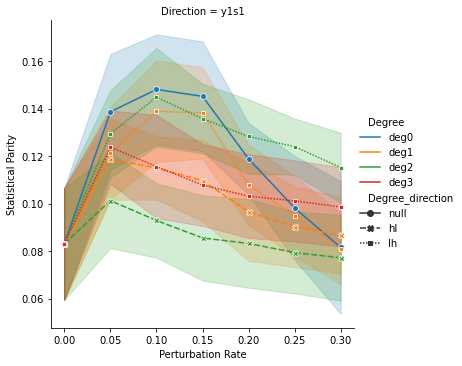

In [24]:
# degree for bail 
facet_kws={'sharey': False, 'sharex': True} #TODO-Y axis only share per row
fg=sns.relplot(data=dl[dl.Strategy.isin(['DD']) & dl.Direction.isin(['y1s1']) & dl.Dataset.isin(['bail']) & dl.Model.isin(['gcn'])],
            x="ptb_rate", y="parity", hue="Degree", style="Degree_direction",ci='sd',
            col="Direction",kind="line",markers=True, dashes=True,#row='Dataset',#palette="Set2",row_order='german bail credit'.split(),
            facet_kws=facet_kws)#col_order='gcn gat gsage fairgnn'.split(),
# plt.legend(bbox_to_anchor=(1,1.02,))
fg.set_ylabels("Statistical Parity", clear_inner=False)
fg.set_xlabels("Perturbation Rate", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
plt.show()
# fg.savefig('bail-credit-pokec-degree'+save_format, bbox_inches='tight')
# plt.close()

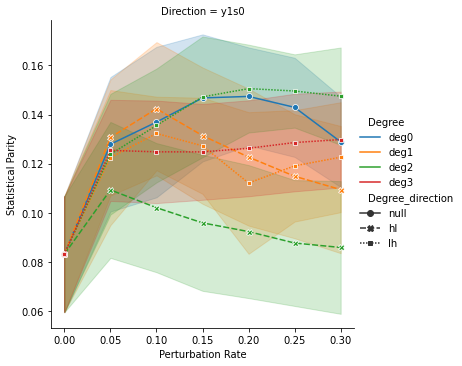

In [25]:
# degree for bail 
facet_kws={'sharey': False, 'sharex': True} #TODO-Y axis only share per row
fg=sns.relplot(data=dl[dl.Strategy.isin(['DE']) & dl.Direction.isin(['y1s0']) & dl.Dataset.isin(['bail']) & dl.Model.isin(['gcn'])],
            x="ptb_rate", y="parity", hue="Degree", style="Degree_direction",ci='sd',
            col="Direction",kind="line",markers=True, dashes=True,#row='Dataset',#palette="Set2",row_order='german bail credit'.split(),
            facet_kws=facet_kws)#col_order='gcn gat gsage fairgnn'.split(),
# plt.legend(bbox_to_anchor=(1,1.02,))
fg.set_ylabels("Statistical Parity", clear_inner=False)
fg.set_xlabels("Perturbation Rate", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
plt.show()
# fg.savefig('bail-credit-pokec-degree'+save_format, bbox_inches='tight')
# plt.close()

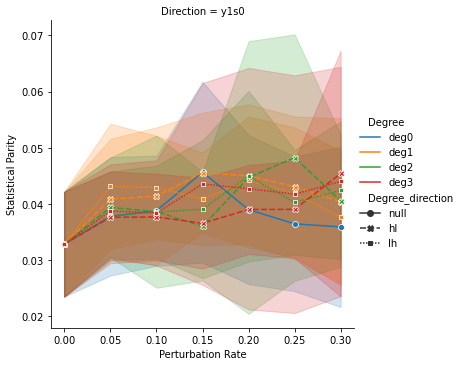

In [15]:
# degree for credit 
facet_kws={'sharey': False, 'sharex': True} #TODO-Y axis only share per row
fg=sns.relplot(data=dl[dl.Strategy.isin(['EE']) & dl.Direction.isin(['y1s0']) & dl.Dataset.isin(['credit']) & dl.Model.isin(['gcn'])],
            x="ptb_rate", y="parity", hue="Degree", style="Degree_direction",ci='sd',
            col="Direction",kind="line",markers=True, dashes=True,#row='Dataset',#palette="Set2",row_order='german bail credit'.split(),
            facet_kws=facet_kws)#col_order='gcn gat gsage fairgnn'.split(),
# plt.legend(bbox_to_anchor=(1,1.02,))
fg.set_ylabels("Statistical Parity", clear_inner=False)
fg.set_xlabels("Perturbation Rate", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
plt.show()
# fg.savefig('bail-credit-pokec-degree'+save_format, bbox_inches='tight')
# plt.close()

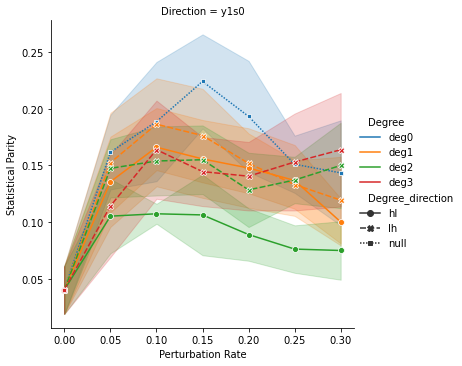

In [27]:
# degree for pokec_z
facet_kws={'sharey': False, 'sharex': True} #TODO-Y axis only share per row
fg=sns.relplot(data=dl[dl.Strategy.isin(['DD']) & dl.Direction.isin(['y1s0']) & dl.Dataset.isin(['pokec_n']) & dl.Model.isin(['gcn'])],
            x="ptb_rate", y="parity", hue="Degree", style="Degree_direction",ci='sd',
            col="Direction",kind="line",markers=True, dashes=True,#row='Dataset',#palette="Set2",row_order='german bail credit'.split(),
            facet_kws=facet_kws)#col_order='gcn gat gsage fairgnn'.split(),
# plt.legend(bbox_to_anchor=(1,1.02,))
fg.set_ylabels("Statistical Parity", clear_inner=False)
fg.set_xlabels("Perturbation Rate", clear_inner=False)
# plt.ylabel("Statistical Parity")
# plt.xlabel("Perturbation Rate") #, fontsize=s
plt.show()
# fg.savefig('bail-credit-pokec-degree'+save_format, bbox_inches='tight')
# plt.close()